In [1]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d dheerajperumandla/drowsiness-dataset


Saving kaggle.json to kaggle.json
 91% 146M/161M [00:01<00:00, 146MB/s]
100% 161M/161M [00:01<00:00, 137MB/s]


In [2]:
!unzip /content/drowsiness-dataset.zip

Archive:  /content/drowsiness-dataset.zip
  inflating: train/Closed/_0.jpg     
  inflating: train/Closed/_1.jpg     
  inflating: train/Closed/_10.jpg    
  inflating: train/Closed/_100.jpg   
  inflating: train/Closed/_101.jpg   
  inflating: train/Closed/_102.jpg   
  inflating: train/Closed/_103.jpg   
  inflating: train/Closed/_104.jpg   
  inflating: train/Closed/_105.jpg   
  inflating: train/Closed/_106.jpg   
  inflating: train/Closed/_107.jpg   
  inflating: train/Closed/_108.jpg   
  inflating: train/Closed/_109.jpg   
  inflating: train/Closed/_11.jpg    
  inflating: train/Closed/_110.jpg   
  inflating: train/Closed/_111.jpg   
  inflating: train/Closed/_112.jpg   
  inflating: train/Closed/_113.jpg   
  inflating: train/Closed/_114.jpg   
  inflating: train/Closed/_115.jpg   
  inflating: train/Closed/_116.jpg   
  inflating: train/Closed/_117.jpg   
  inflating: train/Closed/_118.jpg   
  inflating: train/Closed/_119.jpg   
  inflating: train/Closed/_12.jpg    
  inflat

In [3]:
import tensorflow as tf                       # Import the TensorFlow library
from tensorflow.keras import layers, models   # Import the layers and models from the TensorFlow Keras API
import numpy as np                             # Import NumPy library for array operations
import matplotlib.pyplot as plt                # Import Matplotlib for plotting
import pandas as pd                            # Import Pandas for data handling and analysis
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and validation sets
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score   # Import metrics for evaluating the model performance
import os                                     # Import the os module for accessing files and directories
from tensorflow.keras.preprocessing import image   # Import image preprocessing from Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import the ImageDataGenerator class from Keras for data augmentation

In [4]:
# Load and preprocess the data
data_dir = '/content/train'                            # Set the path to the directory containing the image data
categories = ['/content/train/Open', '/content/train/Closed']    # Define the categories (classes) for the data
num_classes = len(categories)                # Calculate the number of classes
image_height, image_width = 128, 128         # Set the height and width of the images

In [5]:
X = []                                       # Initialize an empty list for the images
y = []                                       # Initialize an empty list for the labels

for category in categories:                  # Loop over the categories
    label = categories.index(category)       # Assign a label (class index) to the current category
    category_dir = os.path.join(data_dir, category)   # Set the path to the current category directory

    for img_name in os.listdir(category_dir):  # Loop over the image files in the current category directory
        img_path = os.path.join(category_dir, img_name)   # Set the path to the current image file
        img = image.load_img(img_path, target_size=(image_height, image_width))  # Load the image and resize it to the desired dimensions
        img_array = image.img_to_array(img)     # Convert the image to an array
        X.append(img_array)                     # Add the image array to the X list
        y.append(label)                         # Add the label to the y list

X = np.array(X) / 255.0                       # Convert the list of image arrays to a numpy array and normalize the pixel values
y = np.array(y)                               # Convert the list of labels to a numpy array

In [6]:
print(X.shape )
y.shape

(1452, 128, 128, 3)


(1452,)

In [7]:
# Split the dataset into training and validation sets, with 80% of the data for training and the rest for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize the ImageDataGenerator for data augmentation with various transformations
data_augmentation = ImageDataGenerator(
    rotation_range=15,      # Rotate the images randomly by up to 15 degrees
    width_shift_range=0.1,  # Shift the images horizontally by up to 10% of their width
    height_shift_range=0.1, # Shift the images vertically by up to 10% of their height
    shear_range=0.1,        # Apply shear transformations to the images
    zoom_range=0.1,         # Zoom in or out on the images by up to 10%
    horizontal_flip=True,   # Flip the images horizontally
    fill_mode='nearest'     # Fill any empty pixels resulting from the transformations using the nearest neighbor method
)

In [9]:

# Define the CNN model architecture
model = models.Sequential([

    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),   # Add a convolutional layer with 256 filters, 3x3 kernel size
    layers.MaxPooling2D((2, 2)),  # Add a max pooling layer with 2x2 pool size
    layers.Conv2D(128, (3, 3), activation='relu'),  # Add another convolutional layer with 128 filters, 3x3 kernel size
    layers.MaxPooling2D((2, 2)), # Add another max pooling layer with 2x2 pool size
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),# Flatten the output of the convolutional layers
    layers.Dense(512, activation='relu'),# Add a dense layer with 512 neurons and ReLU activation function
    layers.Dropout(0.5), # Add a dropout layer with 50% dropout rate
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') # Add a final dense layer with num_classes neurons and softmax activation function
])



In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])#compiles the model by specifying the optimizer, loss function, and evaluation metrics to be used during training

In [14]:
# Train the model using data augmentation
batch_size = 16
epochs = 10
history = model.fit(data_augmentation.flow(X_train, y_train, batch_size=batch_size), epochs=epochs,validation_data=(X_val, y_val),  steps_per_epoch=len(X_train) // batch_size)

Epoch 1/10
72/72 [==============================] - 7s 97ms/step - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.0281 - val_accuracy: 0.9897
Epoch 2/10
72/72 [==============================] - 5s 73ms/step - loss: 0.0301 - accuracy: 0.9895 - val_loss: 0.0153 - val_accuracy: 0.9931
Epoch 3/10
72/72 [==============================] - 5s 70ms/step - loss: 0.0708 - accuracy: 0.9755 - val_loss: 0.0111 - val_accuracy: 0.9931
Epoch 4/10
72/72 [==============================] - 7s 95ms/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 0.0105 - val_accuracy: 0.9966
Epoch 5/10
72/72 [==============================] - 5s 72ms/step - loss: 0.0501 - accuracy: 0.9878 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 6/10
72/72 [==============================] - 5s 72ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0107 - val_accuracy: 0.9931
Epoch 7/10
72/72 [==============================] - 6s 85ms/step - loss: 0.0332 - accuracy: 0.9852 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 8/10
72

In [15]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)  # evaluating the loss and accuracy of the trained model on the validation set.
y_val_pred = np.argmax(model.predict(X_val), axis=-1)   #predicting the class labels of the validation set using the trained model

10/10 [==============================] - 0s 20ms/step


In [16]:
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Validation Loss: 0.007274476811289787
Validation Accuracy: 0.9965635538101196

Confusion Matrix:
 [[147   1]
 [  0 143]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       148
           1       0.99      1.00      1.00       143

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291



In [17]:
# Save the model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model = tf.keras.models.load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

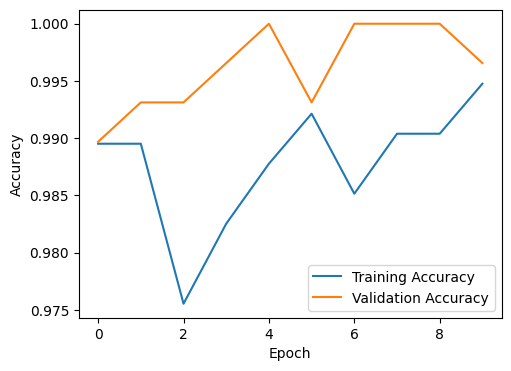

In [18]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

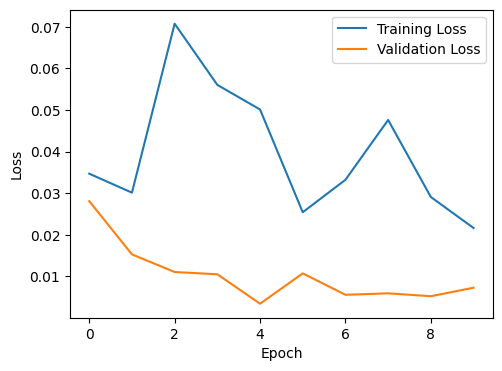

In [19]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
!unzip /content/test1.zip


Archive:  /content/test1.zip
  inflating: test/_1.jpg             
  inflating: test/_118.jpg           
  inflating: test/_120.jpg           
  inflating: test/_121.jpg           
  inflating: test/_122.jpg           
  inflating: test/_123.jpg           
  inflating: test/11.jpg             
  inflating: test/222.jpg            
  inflating: test/download.jpg       
  inflating: test/images.jpg         


1/1 [==============================] - 0s 88ms/step


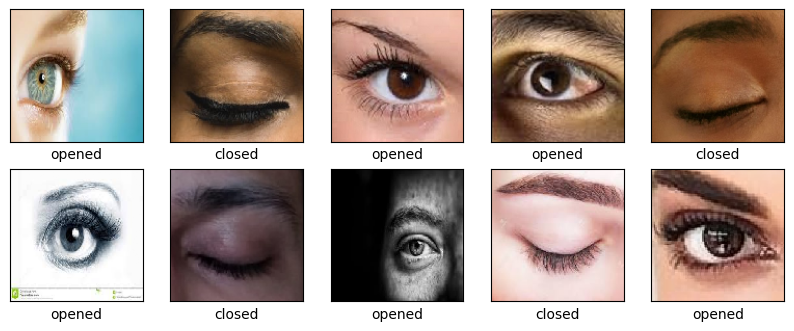

In [23]:
# Load the model
model = models.load_model('model.h5')

# Load test images
test_dir = '/content/test'
test_image_paths = [os.path.join(test_dir, image_name) for image_name in os.listdir(test_dir)]

# Make predictions on test images
test_images = []
for image_path in test_image_paths:
    img = image.load_img(image_path, target_size=(image_height, image_width))
    img_array = image.img_to_array(img)
    test_images.append(img_array)
test_images = np.array(test_images) / 255.0

predictions = model.predict(test_images)
prediction_labels = np.argmax(predictions, axis=-1)

# Plot the predictions
plt.figure(figsize=(10, 10))
for i in range(len(test_images)):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    if prediction_labels[i] == 0:
        plt.xlabel('opened')
    else:
        plt.xlabel('closed')
plt.show()

In [24]:
%%writefile app.py

import streamlit as st
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import models
model = models.load_model('model.h5')
image_height, image_width = 128, 128

st.title('OPEN OR CLOSED EYE')

st.write('This app uses a CNN model to detect if a person is openeing his eye or closeing it  .')
test_image = st.file_uploader('Choose an image...', type=['jpg', 'png'])

if test_image is not None:
    test_image_path = test_image.name
    test_dir = '/tmp'
    os.makedirs(test_dir, exist_ok=True)
    test_image = test_image.getvalue()
    with open(os.path.join(test_dir, test_image_path), "wb") as f:
        f.write(test_image)


    img = image.load_img(os.path.join(test_dir, test_image_path), target_size=(image_height, image_width))
    img_array = image.img_to_array(img)
    test_images = []
    test_images.append(img_array)
    test_images = np.array(test_images) / 255.0

    predictions = model.predict(test_images)
    prediction_labels = np.argmax(predictions, axis=-1)

    st.image(img)
    if prediction_labels[0] == 0:
        st.write('Prediction: The person is opening his eye.')
    else:
        st.write('Prediction: The person is closeing his eye.')

Writing app.py


In [25]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [26]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.136.242.87:8501

npx: installed 22 in 4.723s
your url is: https://tough-views-follow.loca.lt
2023-12-13 08:53:35.373516: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 08:53:35.373573: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 08:53:35.373614: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 08:53:36.340659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-13 08:53:38.5